In [344]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [345]:
data = pd.read_csv('titanic_train.csv')

In [444]:
data.isnull().sum()
data.describe()
data.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [167]:
#sns.countplot(x='Survived',data=data,hue='Pclass')
#sns.boxplot(x='Survived',y='Fare',data=data)
data.groupby('Pclass').mean()[['Age']]
#data.describe(include=['O'])
#sns.countplot(x='Age',data=data,hue='Pclass')
#sns.distplot(data.loc['Age'],bins=30)
data.groupby('Sex').mean()['Survived']
#sns.countplot(x='Survived',data=data,hue='Sex')
data.groupby('SibSp').mean()['Survived'].sort_values(ascending=False)
data.groupby('Parch').mean()['Survived'].sort_values(ascending=False)
#data.groupby('Age').mean()['Survived']

Parch
3    0.600000
1    0.550847
2    0.500000
0    0.343658
5    0.200000
6    0.000000
4    0.000000
Name: Survived, dtype: float64

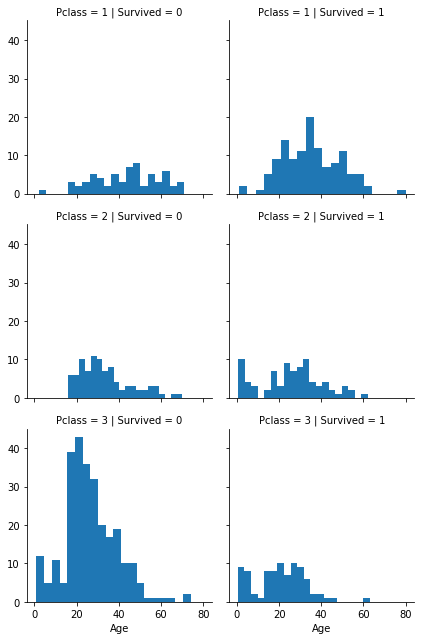

In [168]:
g = sns.FacetGrid(data,col='Survived',row='Pclass')
g.map(plt.hist,'Age',bins=20)

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


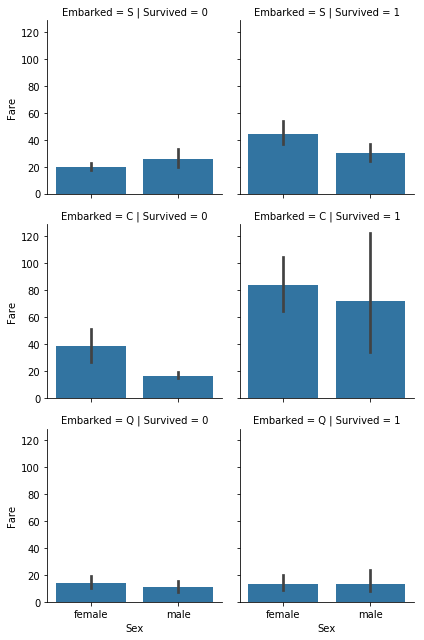

In [169]:
grid = sns.FacetGrid(data,row='Embarked',col='Survived')
grid.map(sns.barplot,'Sex','Fare')

In [170]:
pd.crosstab(data['Survived'],data['Pclass'])


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

In [347]:
data['Title'] = data.Name.str.extract('([A-Za-z]+)\.')
data['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare',inplace=True)

data['Title'] = data['Title'].replace('Mlle','Miss')
data['Title'] = data['Title'].replace('Mme','Miss')
data['Title'] = data['Title'].replace('Ms','Miss')

data.groupby('Title').mean()['Survived']

Title
Master    0.575000
Miss      0.704301
Mr        0.156673
Mrs       0.792000
Rare      0.347826
Name: Survived, dtype: float64

In [428]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Title'] = label_encoder.fit_transform(data['Title'])
data['Embarked'].value_counts()
data['Embarked']
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'].isna().sum()
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])
data['Sex'] = label_encoder.fit_transform(data['Sex'])
#data.drop(['PassengerId','Name'],axis=1)
#data.Cabin
data['deck'] = data.Cabin.str[0]
deck_val = ['A','B','C','D','E','T']
import random

data['deck'] =data['deck'].fillna(random.choice(deck_val))
# #data
data['deck'].value_counts()
data.Age
rand_age = np.random.randint(data.Age.mean()-data.Age.std(),data.Age.mean()+data.Age.std())
data.Age = data.Age.fillna(rand_age)
#sns.distplot(data.Age,bins=50)
data['Ageband'] = pd.cut(data['Age'], 5)
data['Ageband'].value_counts()


AttributeError: 'DataFrame' object has no attribute 'Cabin'

In [349]:
data.Age
data.loc[data['Age']<= 16,'Age']=0
data.loc[(data['Age']>16) & (data['Age']<=32),'Age']=1
data.loc[(data['Age']>32) & (data['Age']<=48),'Age']=2
data.loc[(data['Age']>48) & (data['Age']<=64),'Age']=3
data.loc[(data['Age']>64),'Age']=4


In [350]:
data['Family']= data['SibSp']+data['Parch']+1
data['IsAlone']=0
data.loc[data.Family == 1,'IsAlone']=1
#data.groupby('IsAlone').mean()['Survived']

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  1.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  2.0      1   
2                               Heikkinen, Miss. Laina    0  1.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1   
4                             Allen, Mr. William Henry    1  2.0      0   
5                                     Moran, Mr. James    1  1.0      0   
6                              McCarthy, Mr. Timothy J    1  3.0      0   
7                       Palsson, Master. Gosta Leonard    1  0.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  1.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)    0  0.0      1   
10                     Sandstrom, Miss. Marguerite Rut    0  0.0      1   
11                            Bonnell, Miss. Elizabeth    0  3.0      0   
12                      Saundercock, Mr. William Henry    1  1.0      0   
13                         Andersson, Mr. Anders Johan    1  2.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina    0  0.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)     0  3.0      0   
16                                Rice, Master. Eugene    1  0.0      4   
17                        Williams, Mr. Charles Eugene    1  1.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  1.0      1   
19                             Masselmani, Mrs. Fatima    0  1.0      0   
20                                Fynney, Mr. Joseph J    1  2.0      0  

In [353]:
data['Fareband'] = pd.qcut(data['Fare'],4)
data

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
7              8         0       3   
8              9         1       3   
9             10         1       2   
10            11         1       3   
11            12         1       1   
12            13         0       3   
13            14         0       3   
14            15         0       3   
15            16         1       2   
16            17         0       3   
17            18         1       2   
18            19         0       3   
19            20         1       3   
20            21         0       2   
21            22         1       2   
22            23         1       3   
23            24         1       1   
24            25         0       3   
25            26         1       3   
26            27         0       3   
27            28         0       1   
28            29         1       3   
29            30         0       3   
..           ...       ...     ...   
861          862         0       2   
862          863         1       1   
863          864         0       3   
864          865         0       2   
865          866         1       2   
866          867         1       2   
867          868         0       1   
868          869         0       3   
869          870         1       3   
870          871         0       3   
871          872         1       1   
872          873         0       1   
873          874         0       3   
874          875         1       2   
875          876         1       3   
876          877         0       3   
877          878         0       3   
878          879         0       3   
879          880         1       1   
880          881         1       2   
881          882         0       3   
882          883         0       3   
883          884         0       2   
884          885         0       3   
885          886         0       3   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex  Age  SibSp  \
0                              Braund, Mr. Owen Harris    1  1.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...    0  2.0      1   
2                               Heikkinen, Miss. Laina    0  1.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  2.0      1   
4                             Allen, Mr. William Henry    1  2.0      0   
5                                     Moran, Mr. James    1  1.0      0   
6                              McCarthy, Mr. Timothy J    1  3.0      0   
7                       Palsson, Master. Gosta Leonard    1  0.0      3   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0  1.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)    0  0.0      1   
10                     Sandstrom, Miss. Marguerite Rut    0  0.0      1   
11                            Bonnell, Miss. Elizabeth    0  3.0      0   
12                      Saundercock, Mr. William Henry    1  1.0      0   
13                         Andersson, Mr. Anders Johan    1  2.0      1   
14                Vestrom, Miss. Hulda Amanda Adolfina    0  0.0      0   
15                    Hewlett, Mrs. (Mary D Kingcome)     0  3.0      0   
16                                Rice, Master. Eugene    1  0.0      4   
17                        Williams, Mr. Charles Eugene    1  1.0      0   
18   Vander Planke, Mrs. Julius (Emelia Maria Vande...    0  1.0      1   
19                             Masselmani, Mrs. Fatima    0  1.0      0   
20                                Fynney, Mr. Joseph J    1  2.0      0  

In [355]:
data.loc[data['Fare']<=7.91,'Fare']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454),'Fare']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31),'Fare']=2
data.loc[(data['Fare']>31),'Fare']=3

In [373]:
data
data.Fare = data.Fare.astype(int)

In [360]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Ageband','Family','Fareband'],axis=1,inplace=True)

In [362]:
data.drop('Cabin',axis=1)

Survived  Pclass  Sex  Age  Fare  Embarked  Title deck  IsAlone
0           0       3    1  1.0     0         2      2    E        0
1           1       1    0  2.0     3         0      3    C        0
2           1       3    0  1.0     1         2      1    E        1
3           1       1    0  2.0     3         2      3    C        0
4           0       3    1  2.0     1         2      2    E        1
5           0       3    1  1.0     1         1      2    E        1
6           0       1    1  3.0     3         2      2    E        1
7           0       3    1  0.0     2         2      0    E        0
8           1       3    0  1.0     1         2      3    E        0
9           1       2    0  0.0     2         0      3    E        0
10          1       3    0  0.0     2         2      1    G        0
11          1       1    0  3.0     2         2      1    C        1
12          0       3    1  1.0     1         2      2    E        1
13          0       3    1  2.0     3         2      2    E        0
14          0       3    0  0.0     0         2      1    E        1
15          1       2    0  3.0     2         2      3    E        1
16          0       3    1  0.0     2         1      0    E        0
17          1       2    1  1.0     1         2      2    E        1
18          0       3    0  1.0     2         2      3    E        0
19          1       3    0  1.0     0         0      3    E        1
20          0       2    1  2.0     2         2      2    E        1
21          1       2    1  2.0     1         2      2    D        1
22          1       3    0  0.0     1         1      1    E        1
23          1       1    1  1.0     3         2      2    A        1
24          0       3    0  0.0     2         2      1    E        0
25          1       3    0  2.0     3         2      3    E        0
26          0       3    1  1.0     0         0      2    E        1
27          0       1    1  1.0     3         2      2    C        0
28          1       3    0  1.0     0         1      1    E        1
29          0       3    1  1.0     0         2      2    E        1
..        ...     ...  ...  ...   ...       ...    ...  ...      ...
861         0       2    1  1.0     1         2      2    E        0
862         1       1    0  2.0     2         2      3    D        1
863         0       3    0  1.0     3         2      1    E        0
864         0       2    1  1.0     1         2      2    E        1
865         1       2    0  2.0     1         2      3    E        1
866         1       2    0  1.0     1         0      1    E        0
867         0       1    1  1.0     3         2      2    A        1
868         0       3    1  1.0     1         2      2    E        1
869         1       3    1  0.0     1         2      0    E        0
870         0       3    1  1.0     0         2      2    E        1
871         1       1    0  2.0     3         2      3    D        0
872         0       1    1  2.0     0         2      2    B        1
873         0       3    1  2.0     1         2      2    E        1
874         1       2    0  1.0     2         0      3    E        0
875         1       3    0  0.0     0         0      1    E        1
876         0       3    1  1.0     1         2      2    E        1
877         0       3    1  1.0     0         2      2    E        1
878         0       3    1  1.0     0         2      2    E        1
879         1       1    0  3.0     3         0      3    C        0
880         1       2    0  1.0     2         2      3    E        0
881         0       3    1  2.0     0         2      2    E        1
882         0       3    0  1.0     1         2      1    E        1
883         0       2    1  1.0     1         2      2    E        1
884         0       3    1  1.0     0         2      2    E        1
885         0       3    0  2.0     2         1      3    E        0
886         0       2    1  1.0     1         2      4    E        1
887

In [365]:
data.drop('Cabin',axis=1,inplace=True)

In [374]:
data['deck'] = label_encoder.fit_transform(data['deck'])
data
data.Age = data.Age.astype(int)


In [382]:
X = data.drop('Survived',axis=1)
Y = data['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=0)

In [433]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred = log_reg.predict(X_test)
log_reg.score(X_test,Y_test)
#f1_score(Y_test,y_pred)
# acc_log = round(log_reg.score(X_train, Y_train) * 100, 2)
# acc_log
# p= (y_pred != Y_test).sum()
# p
from sklearn.svm import SVC
svc = SVC(C=1)
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
# acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
# acc_svc
f1_score(Y_test,Y_pred)



ValueError: Shape of passed values is (1, 8), indices imply (1, 9)

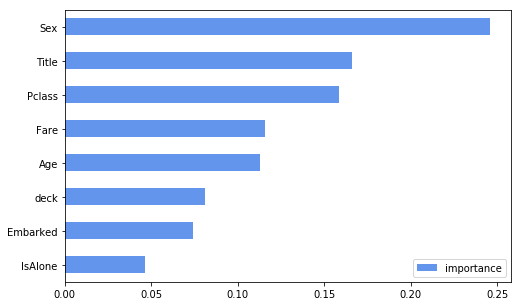

In [442]:

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
f1_score(Y_test,Y_pred)
ratios = random_forest.feature_importances_

feature_important = pd.DataFrame(index=X_train.columns, data=ratios, columns=['importance'])
feature_important

feature_important = feature_important.sort_values(by=['importance'], ascending=True)
feature_important.plot(kind='barh', stacked=True, color=['cornflowerblue'], grid=False, figsize=(8, 5))